### PUDL project

##### Importing the required librarys

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import impute
import seaborn as sns


In [2]:
PDU =pd.read_csv(r"D:\portfolio projects\python\PUDL\fuel_receipts_costs_eia923.csv")

C:\Users\tilak\AppData\Local\Temp\ipykernel_26632\3003694802.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  PDU =pd.read_csv(r"D:\portfolio projects\python\PUDL\fuel_receipts_costs_eia923.csv")


### Looking for NA values


In [3]:
PDU.isnull().sum()

rowid                                            0
plant_id_eia                                     0
plant_id_eia_label                           11165
report_date                                      0
contract_type_code                             238
contract_type_code_label                       238
contract_expiration_date                    344302
energy_source_code                               1
energy_source_code_label                         1
fuel_type_code_pudl                              1
fuel_group_code                                  1
mine_id_pudl                                391947
mine_id_pudl_label                          391947
supplier_name                                    3
fuel_received_units                              0
fuel_mmbtu_per_unit                              0
sulfur_content_pct                               0
ash_content_pct                                  0
mercury_content_ppm                         289482
fuel_cost_per_mmbtu            

### Dropping the variables that have categorical and non-significant

In [4]:
PDU1=PDU.copy()
PDU1.drop(['rowid','plant_id_eia','plant_id_eia_label','report_date','contract_type_code_label',
         'contract_expiration_date','energy_source_code','energy_source_code_label','fuel_type_code_pudl',
           'primary_transportation_mode_code','primary_transportation_mode_code_label','supplier_name',
           'secondary_transportation_mode_code','secondary_transportation_mode_code_label','natural_gas_transport_code',
           'natural_gas_delivery_contract_type_code','report_date','data_maturity','data_maturity_label'  ] ,axis=1,inplace= True)

In [5]:

PDU1.isnull().sum()

contract_type_code         238
fuel_group_code              1
mine_id_pudl            391947
mine_id_pudl_label      391947
fuel_received_units          0
fuel_mmbtu_per_unit          0
sulfur_content_pct           0
ash_content_pct              0
mercury_content_ppm     289482
fuel_cost_per_mmbtu     200240
moisture_content_pct    516589
chlorine_content_ppm    516589
dtype: int64

### Droping the missing values in our new data set contains 65066 rows and using the 12 required columns


In [6]:
PDU1=PDU1.dropna()
PDU1

,contract_type_code,fuel_group_code,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
315779,C,coal,1038.0,1038.0,167498.0,21.284,0.55,7.60,0.000,3.978,0.00,0.0
315780,C,coal,1038.0,1038.0,37259.0,22.634,0.36,7.70,0.000,1.849,0.00,0.0
315783,C,coal,3106.0,3106.0,8157.0,25.177,1.81,13.20,0.000,3.678,3.91,0.0
315786,C,coal,1038.0,1038.0,43585.0,21.284,0.55,7.60,0.000,4.345,0.00,0.0
315787,C,coal,4019.0,4019.0,77250.0,23.948,1.33,12.60,0.000,3.997,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
608335,S,coal,20.0,20.0,78353.0,18.090,0.22,4.57,0.000,2.290,26.56,0.0
608343,C,coal,660.0,660.0,47191.0,16.160,0.35,5.30,0.093,0.814,31.65,0.0
608344,C,coal,605.0,605.0,200719.0,16.100,0.28,4.70,0.000,0.891,32.29,0.0
608372,C,coal,633.0,633.0,24744.0,12.400,0.63,11.30,0.108,2.695,37.25,0.0


###  Adding Lable to categorical value to convert categorical to numerical value

In [7]:
 
PDU1['contract_type_code'] = PDU1['contract_type_code'].map({'C': 1,'NC': 2,'S': 3, 'T': 4})
PDU1['fuel_group_code'] = PDU1['fuel_group_code'].map({'coal': 1,'natural_gas': 2,'other_gas': 3, 'petroleum': 4,'petroleum_coke':5})

### choosing random 2 % of data from new data set has 13013 rows

In [8]:
PDU_set1 = PDU1.sample(13013)
PDU_set1

,contract_type_code,fuel_group_code,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
357729,1,1,660.0,660.0,118136.0,15.874,0.39,5.6,0.00,1.153,32.81,0.0
463948,1,1,38.0,38.0,89407.0,16.755,0.41,5.2,0.07,1.688,30.32,57.0
486250,3,1,4016.0,4016.0,11701.0,22.962,2.83,8.3,0.00,2.933,13.05,0.0
402504,3,1,3867.0,3867.0,34167.0,22.602,3.11,8.1,0.00,1.909,13.25,0.0
569662,1,1,20.0,20.0,31942.0,18.050,0.19,4.5,0.00,2.158,27.05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
323939,1,1,19.0,19.0,395292.0,17.100,0.25,4.5,0.00,2.133,0.00,0.0
379526,1,1,4407.0,4407.0,36711.0,15.060,2.01,23.2,0.00,1.715,23.67,0.0
382330,1,1,19.0,19.0,98490.0,17.703,0.20,4.5,0.00,1.281,27.30,0.0
323964,1,1,35.0,35.0,125003.0,16.830,0.34,5.8,0.00,2.060,0.00,0.0


###  spliting the data into test and train

In [9]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(PDU_set1, test_size=0.25,random_state=12)
Dtrain= train.copy()

### Normalsing the train data

In [10]:
dfnormalize= preprocessing.normalize(train)
print(type(train))
print(train.columns)
PDU2=pd.DataFrame(dfnormalize, columns=train.columns)
PDU2

<class 'pandas.core.frame.DataFrame'>
Index(['contract_type_code', 'fuel_group_code', 'mine_id_pudl',
       'mine_id_pudl_label', 'fuel_received_units', 'fuel_mmbtu_per_unit',
       'sulfur_content_pct', 'ash_content_pct', 'mercury_content_ppm',
       'fuel_cost_per_mmbtu', 'moisture_content_pct', 'chlorine_content_ppm'],
      dtype='object')


,contract_type_code,fuel_group_code,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
0,0.000005,0.000005,0.000095,0.000095,1.000000,0.000085,0.000001,0.000023,0.000000,0.000010,0.000147,0.0
1,0.000022,0.000022,0.000434,0.000434,1.000000,0.000389,0.000005,0.000095,0.000002,0.000046,0.000586,0.0
2,0.000062,0.000062,0.018225,0.018225,0.999666,0.001402,0.000180,0.000496,0.000000,0.000120,0.000787,0.0
3,0.000444,0.000148,0.630005,0.630005,0.454059,0.003778,0.000483,0.001863,0.000000,0.000325,0.000656,0.0
4,0.000922,0.000307,0.644518,0.644518,0.411238,0.007569,0.000274,0.004122,0.000000,0.000854,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9754,0.000031,0.000031,0.000623,0.000623,0.999999,0.000549,0.000009,0.000159,0.000000,0.000053,0.000853,0.0
9755,0.000294,0.000294,0.018255,0.018255,0.999632,0.007227,0.000233,0.003510,0.000000,0.000854,0.002032,0.0
9756,0.000005,0.000005,0.006932,0.006932,0.999952,0.000087,0.000005,0.000075,0.000000,0.000010,0.000087,0.0
9757,0.000288,0.000096,0.371858,0.371858,0.850551,0.002279,0.000264,0.000760,0.000000,0.000149,0.001066,0.0


### Ploting the graph from train data to understand structure

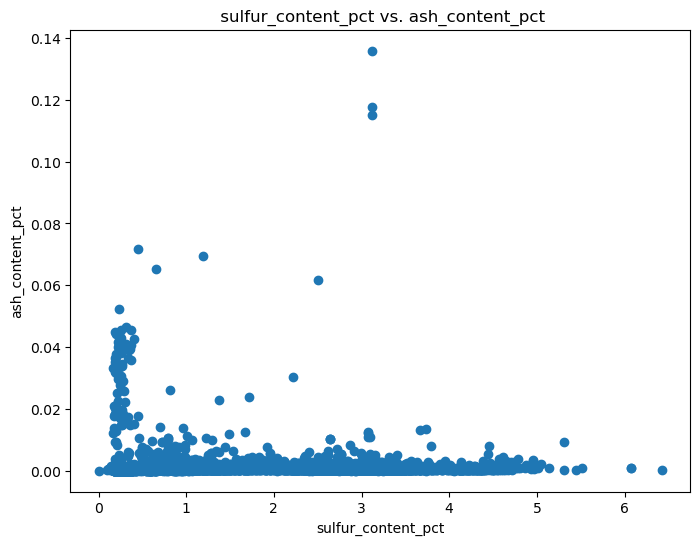

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(train.sulfur_content_pct,PDU2.ash_content_pct)
plt.xlabel('sulfur_content_pct')
plt.ylabel('ash_content_pct')
plt.title(' sulfur_content_pct vs. ash_content_pct')
plt.show()

### Applying Elbow method to view appropriate clusters

In [12]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,init='k-means++', max_iter=1000)
    
    kmeans.fit(PDU2)
    
    sse[k] = kmeans.inertia_ 


C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [13]:
sse

{1: 827.4319620242454,
 2: 230.3469782982278,
 3: 98.1312540661453,
 4: 57.933415148538096,
 5: 36.95806516890465,
 6: 29.695027642545345,
 7: 22.753959390382974,
 8: 20.692673127142015,
 9: 18.02343697914338}

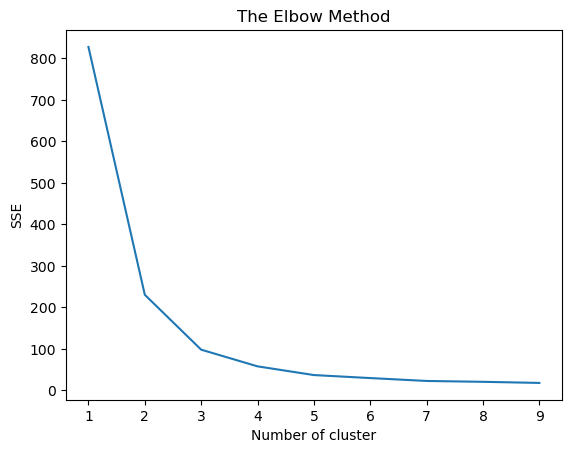

In [14]:
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('The Elbow Method')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

###  After identifying the SSE value, choosen k=3 is good to from clusters to the data

In [15]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=1000,n_init = 10, random_state = 0) 

cluster_ids=kmeans.fit_predict(PDU2)
centers=kmeans.cluster_centers_
print(centers)

[[7.29299792e-05 5.07590211e-05 1.84591531e-02 1.84591531e-02
  9.98374406e-01 1.00892224e-03 5.08467722e-05 3.45030248e-04
  7.39180390e-07 1.11220374e-04 9.31502067e-04 1.38464623e-03]
 [4.85333939e-04 2.56490705e-04 6.22866397e-01 6.22866397e-01
  3.92487184e-01 5.70306165e-03 3.77472392e-04 2.58575194e-03
  4.59610765e-06 6.18239486e-04 2.81007978e-03 1.89959092e-02]
 [5.30966442e-04 3.38528915e-04 2.57557502e-01 2.57557502e-01
  9.19263352e-01 6.79663804e-03 3.27101529e-04 2.32431643e-03
  3.57070851e-06 7.74768296e-04 5.43216253e-03 5.55914498e-03]]


In [16]:

train["cluster"]=kmeans.fit_predict(PDU2)
train


,contract_type_code,fuel_group_code,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm,cluster
366308,1,1,19.0,19.0,199826.0,17.084,0.25,4.60,0.00,2.079,29.30,0.0,0
518143,1,1,20.0,20.0,46113.0,17.950,0.22,4.40,0.07,2.099,27.00,0.0,0
583639,1,1,294.0,294.0,16126.0,22.624,2.91,8.00,0.00,1.928,12.69,0.0,0
336000,3,1,4261.0,4261.0,3071.0,25.550,3.27,12.60,0.00,2.200,4.44,0.0,1
354906,3,1,2097.0,2097.0,1338.0,24.626,0.89,13.41,0.00,2.778,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
514947,1,1,20.0,20.0,32116.0,17.638,0.30,5.10,0.00,1.702,27.40,0.0,0
414192,1,1,62.0,62.0,3395.0,24.546,0.79,11.92,0.00,2.900,6.90,0.0,0
429068,1,1,1470.0,1470.0,212050.0,18.420,1.00,16.00,0.00,2.140,18.40,0.0,0
545932,3,1,3867.0,3867.0,8845.0,23.700,2.75,7.90,0.00,1.552,11.09,0.0,2


In [46]:
df = train.copy()
fuel_mapping = {
    1: "coal",
    2: "natural_gas",
    3: "other_gas",
    4: "petroleum",
    5: "petroleum_coke"
}
df["fuel_group_label"] = df["fuel_group_code"].map(fuel_mapping)
dominant_fuel = df.groupby("cluster")["fuel_group_label"].agg(lambda x: x.value_counts().idxmax())
print("Dominant Fuel Group per Cluster:")
print(dominant_fuel)
df["dominant_fuel_label"] = df["cluster"].map(dominant_fuel)
print(df.head())


Dominant Fuel Group per Cluster:
cluster
0    coal
1    coal
2    coal
Name: fuel_group_label, dtype: object
        contract_type_code  fuel_group_code  mine_id_pudl  mine_id_pudl_label  \
366308                   1                1          19.0                19.0   
518143                   1                1          20.0                20.0   
583639                   1                1         294.0               294.0   
336000                   3                1        4261.0              4261.0   
354906                   3                1        2097.0              2097.0   

        fuel_received_units  fuel_mmbtu_per_unit  sulfur_content_pct  \
366308             199826.0               17.084                0.25   
518143              46113.0               17.950                0.22   
583639              16126.0               22.624                2.91   
336000               3071.0               25.550                3.27   
354906               1338.0               24

### Applying Silhouette method

In [17]:
import sklearn.metrics as metrics
import sklearn.cluster as cluster
SK = range(2,13)
sil_score = []
for i in SK:
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=42).fit(PDU2).labels_
    score = metrics.silhouette_score(PDU2,labels,metric="euclidean",sample_size=250,random_state=42)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(PDU2,labels,metric="euclidean",sample_size=250,random_state=42)))

Silhouette score for k(clusters) = 2 is 0.820634690937023
Silhouette score for k(clusters) = 3 is 0.7806944130709675
Silhouette score for k(clusters) = 4 is 0.7780889357415725
Silhouette score for k(clusters) = 5 is 0.750215777154893
Silhouette score for k(clusters) = 6 is 0.7559024700945456
Silhouette score for k(clusters) = 7 is 0.7460811472453213
Silhouette score for k(clusters) = 8 is 0.7516266011735626
Silhouette score for k(clusters) = 9 is 0.7516266011735626
Silhouette score for k(clusters) = 10 is 0.7503694437251134
Silhouette score for k(clusters) = 11 is 0.7530097479806284
Silhouette score for k(clusters) = 12 is 0.7287151285089459


In [18]:

sil_centers = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sil_centers

,Clusters,Sil Score
0,2,0.820635
1,3,0.780694
2,4,0.778089
3,5,0.750216
4,6,0.755902
5,7,0.746081
6,8,0.751627
7,9,0.751627
8,10,0.750369
9,11,0.753010


<Axes: xlabel='Clusters', ylabel='Sil Score'>

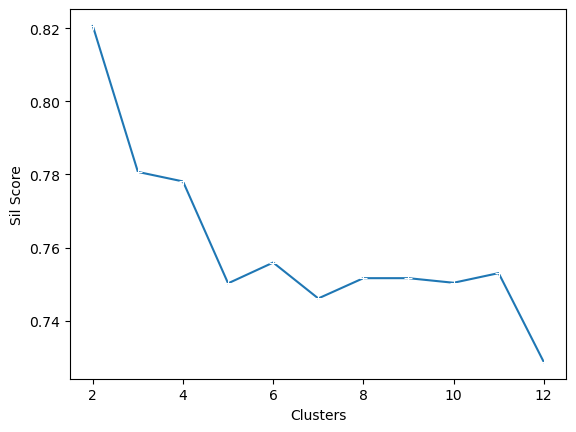

In [19]:
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = sil_centers, marker="+")




###  Plotting the clusters according the  clusters=3 

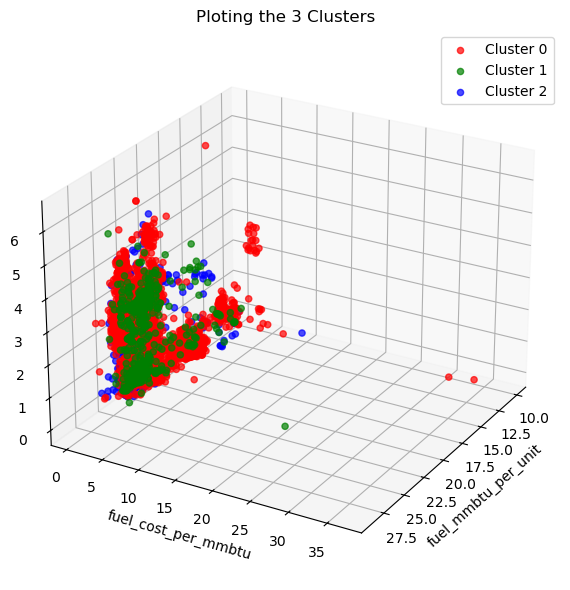

In [21]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')
colors = ['red', 'green', 'blue']
features = ['fuel_mmbtu_per_unit', 'fuel_cost_per_mmbtu', 'sulfur_content_pct']
for i in range(3):
    idx = np.where(cluster_ids == i)[0]
 
    ax.scatter(
        Dtrain.iloc[idx][features[0]],
        Dtrain.iloc[idx][features[1]],
        Dtrain.iloc[idx][features[2]],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7  
    )

ax.view_init(elev=25, azim=30)

# Label the axes
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])

ax.set_title("Ploting the 3 Clusters")
ax.legend()
plt.tight_layout()
plt.show()

### Analysing the data acoording to the 3 cluster Ids

In [22]:
train[cluster_ids==0].describe()

,contract_type_code,fuel_group_code,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm,cluster
count,7526.000000,7526.0,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,7526.000000,7526.0
mean,1.324077,1.0,750.678315,750.678315,70110.530561,19.854798,1.106699,7.211969,0.016191,2.153558,19.217608,33.823678,0.0
std,0.732227,0.0,1276.078513,1276.078513,84033.973238,3.331668,1.210331,3.468546,0.037456,0.845971,10.325937,210.295918,0.0
min,1.000000,1.0,4.000000,4.000000,179.000000,10.100000,0.100000,2.300000,0.000000,0.485000,0.000000,0.000000,0.0
25%,1.000000,1.0,20.000000,20.000000,22403.500000,17.492500,0.240000,4.800000,0.000000,1.731000,9.922500,0.000000,0.0
50%,1.000000,1.0,42.000000,42.000000,42467.500000,17.962500,0.360000,5.800000,0.000000,2.059000,25.810000,0.000000,0.0
75%,1.000000,1.0,662.000000,662.000000,82327.750000,23.055500,2.340000,8.700000,0.000000,2.440000,27.550000,0.000000,0.0
max,3.000000,1.0,4521.000000,4521.000000,935695.000000,28.620000,6.430000,39.600000,0.600000,36.746000,56.550000,3172.000000,0.0


In [23]:
train[cluster_ids==1].describe()


,contract_type_code,fuel_group_code,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm,cluster
count,618.000000,618.0,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.0
mean,1.927184,1.0,3323.231392,3323.231392,2275.199029,23.148028,1.741165,11.031262,0.012235,2.502623,8.887718,89.461165,1.0
std,0.979302,0.0,1016.926593,1016.926593,1792.817575,2.533308,1.039417,5.023029,0.036067,1.090388,6.295499,302.149822,0.0
min,1.000000,1.0,103.000000,103.000000,7.000000,11.400000,0.140000,0.600000,0.000000,0.941000,0.000000,0.000000,1.0
25%,1.000000,1.0,2346.750000,2346.750000,715.000000,22.820000,0.850000,8.285000,0.000000,1.978500,5.882500,0.000000,1.0
50%,1.000000,1.0,3870.000000,3870.000000,1757.000000,23.777000,1.230000,9.900000,0.000000,2.474500,8.175000,0.000000,1.0
75%,3.000000,1.0,4171.000000,4171.000000,3361.250000,24.400000,2.747500,12.087500,0.000000,2.919000,11.940000,0.000000,1.0
max,3.000000,1.0,4552.000000,4552.000000,6640.000000,27.168000,5.450000,49.800000,0.317000,23.615000,35.580000,1800.000000,1.0


In [24]:
train[cluster_ids==2].describe()


,contract_type_code,fuel_group_code,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm,cluster
count,1615.000000,1615.0,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.0
mean,1.733746,1.0,3139.751084,3139.751084,12267.015480,23.641582,1.765641,10.200483,0.010055,2.661581,8.650514,73.578947,2.0
std,0.960016,0.0,1092.582908,1092.582908,5820.514844,2.258578,1.063052,3.487930,0.032387,0.749060,5.921006,316.722516,0.0
min,1.000000,1.0,19.000000,19.000000,48.000000,12.200000,0.000000,0.000000,0.000000,1.123000,0.000000,0.000000,2.0
25%,1.000000,1.0,2299.000000,2299.000000,9022.500000,23.020000,0.860000,8.200000,0.000000,2.099500,5.930000,0.000000,2.0
50%,1.000000,1.0,3063.000000,3063.000000,11869.000000,24.010000,1.290000,9.350000,0.000000,2.586000,7.300000,0.000000,2.0
75%,3.000000,1.0,4023.500000,4023.500000,13576.500000,24.962000,2.800000,11.800000,0.000000,3.135000,11.260000,0.000000,2.0
max,3.000000,1.0,4561.000000,4561.000000,30164.000000,28.822000,5.310000,40.100000,0.383000,13.552000,38.050000,3096.000000,2.0


### Fuel receving units cluster 0 has high meand and std then other two clusters means the power plants in this cluster will purchasing highest fuel quantity
### Fuel cost effectingt the most so cluster 0 has low fuel cost than other cluster
### Sulphur content is low in cluster 2 when it compared with other cluster 1 and 0
### Moisture content is more in cluster 0 it has highest mean vlaue
### Ash content is low means value of 7 when it compared with has cluster 1 and 2 
### chlorine content is more in cluster 2 vey low in cluster 0

###  Graphical representation of clusters with respect to their varibles

In [25]:
columns=['contract_type_code','fuel_group_code','mine_id_pudl','fuel_received_units','fuel_mmbtu_per_unit','sulfur_content_pct','ash_content_pct','mercury_content_ppm','fuel_cost_per_mmbtu','moisture_content_pct','chlorine_content_ppm']
list(enumerate(columns))

[(0, 'contract_type_code'),
 (1, 'fuel_group_code'),
 (2, 'mine_id_pudl'),
 (3, 'fuel_received_units'),
 (4, 'fuel_mmbtu_per_unit'),
 (5, 'sulfur_content_pct'),
 (6, 'ash_content_pct'),
 (7, 'mercury_content_ppm'),
 (8, 'fuel_cost_per_mmbtu'),
 (9, 'moisture_content_pct'),
 (10, 'chlorine_content_ppm')]

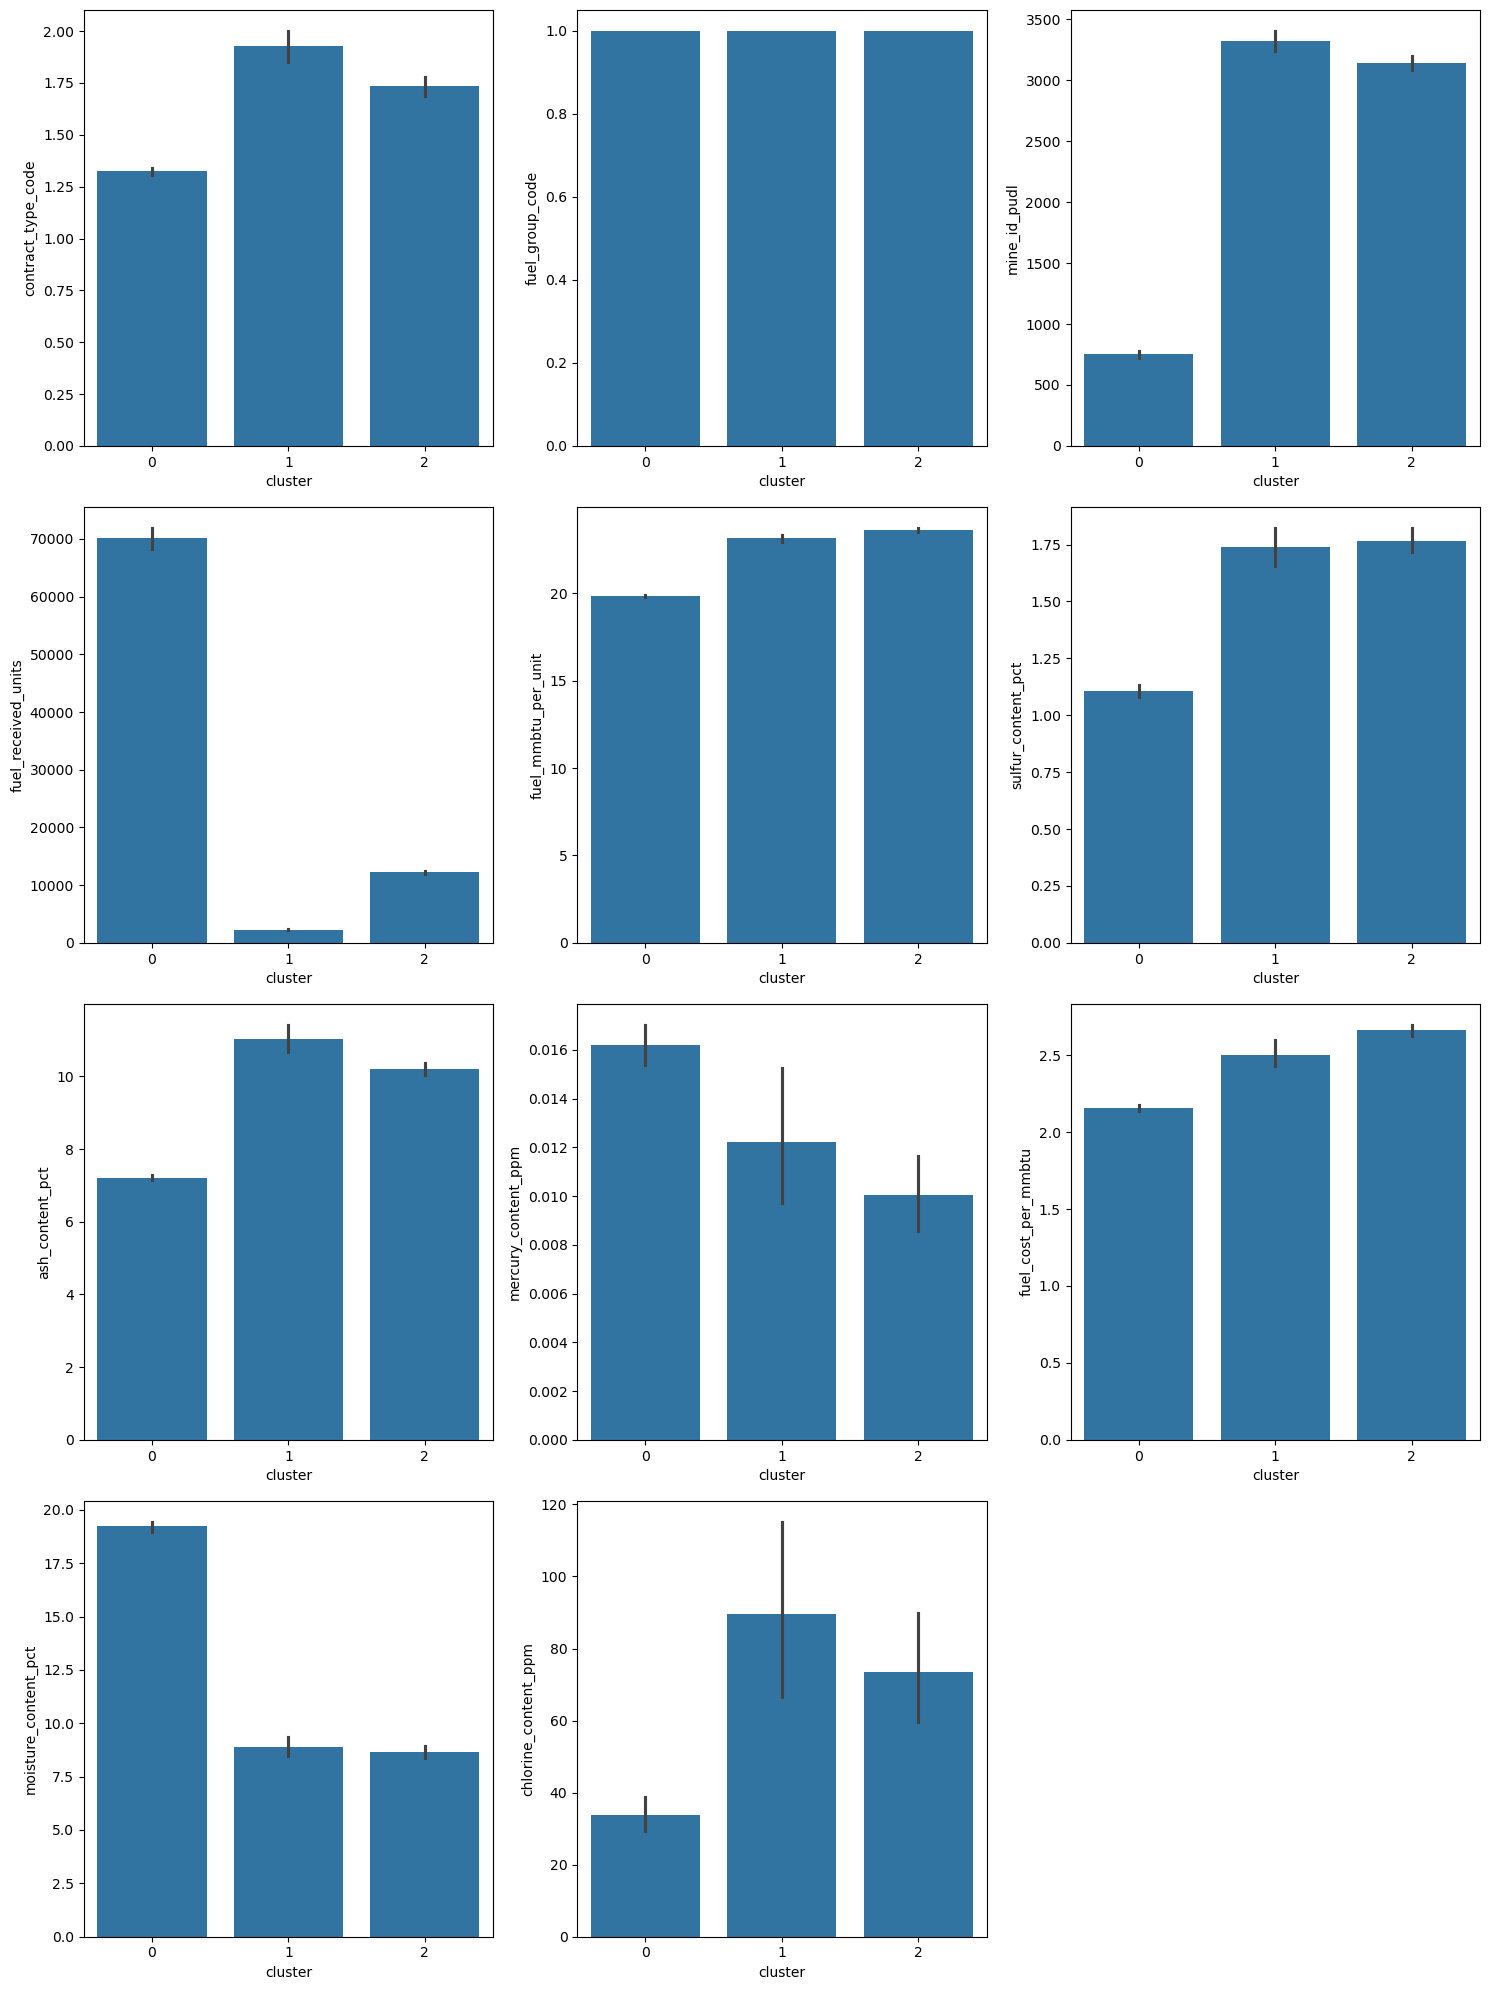

In [26]:
plt.figure(figsize=(15,20))
for i in enumerate(columns):
    plt.subplot(4,3,i[0]+1)
    sns.barplot(x='cluster',y=i[1],data=train)
plt.tight_layout()

### After anyalysing the different clusters cluster0 is performing well with low fuel cost and eco friendly. I would like to suggest other power plants adopt some new measures like purchasing the fuel from one supplier will also help to reduce in fuel cost and i suggest to use efficiency of calorific value to adopt advanced boiler techniques to reduce fuel usage

### Applying Multiple linear Regression on test set to validate the best variable to form clusters

###### Normalising the  test data

In [27]:
dfnormalize= preprocessing.normalize(test)
print(type(test))
print(PDU_set1.columns)
PDU3=pd.DataFrame(dfnormalize, columns=PDU_set1.columns)
PDU3

<class 'pandas.core.frame.DataFrame'>
Index(['contract_type_code', 'fuel_group_code', 'mine_id_pudl',
       'mine_id_pudl_label', 'fuel_received_units', 'fuel_mmbtu_per_unit',
       'sulfur_content_pct', 'ash_content_pct', 'mercury_content_ppm',
       'fuel_cost_per_mmbtu', 'moisture_content_pct', 'chlorine_content_ppm'],
      dtype='object')


,contract_type_code,fuel_group_code,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
0,0.000033,0.000033,0.000662,0.000662,0.999999,0.000594,0.000008,0.000152,0.000002,0.000044,0.000891,0.000000
1,0.000015,0.000015,0.000690,0.000690,0.999999,0.000364,0.000046,0.000132,0.000000,0.000039,0.000142,0.000000
2,0.000029,0.000029,0.112051,0.112051,0.987364,0.000670,0.000082,0.000241,0.000000,0.000056,0.000345,0.000000
3,0.000004,0.000004,0.000475,0.000475,1.000000,0.000063,0.000001,0.000022,0.000000,0.000007,0.000110,0.000000
4,0.000033,0.000033,0.000661,0.000661,0.999999,0.000590,0.000008,0.000175,0.000000,0.000064,0.000873,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3249,0.000021,0.000021,0.001108,0.001108,0.999999,0.000353,0.000005,0.000088,0.000000,0.000038,0.000603,0.000000
3250,0.000006,0.000006,0.026021,0.026021,0.999309,0.000148,0.000020,0.000057,0.000000,0.000015,0.000085,0.005184
3251,0.000041,0.000014,0.002382,0.002382,0.999994,0.000230,0.000005,0.000068,0.000000,0.000027,0.000415,0.000000
3252,0.000068,0.000068,0.001429,0.001429,0.999996,0.001224,0.000012,0.000306,0.000000,0.000134,0.001782,0.000000


### Importing the linear Regression Model and identifying the variables by p value

In [28]:
from sklearn import linear_model
import statsmodels.api as sm
#import statsmodels.formula.api as smf
x=PDU3[['contract_type_code', 'fuel_group_code','mine_id_pudl', 'mine_id_pudl_label', 'fuel_received_units',
       'fuel_mmbtu_per_unit', 'sulfur_content_pct', 'ash_content_pct',
       'mercury_content_ppm', 'moisture_content_pct',
       'chlorine_content_ppm']]
y=PDU3['fuel_cost_per_mmbtu']
regr = linear_model.LinearRegression()
regr.fit(x,y)
mlr = sm.OLS(y,x).fit()
predictions = mlr.predict(x)
mlr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     fuel_cost_per_mmbtu   R-squared (uncentered):                   0.979
Model:                             OLS   Adj. R-squared (uncentered):              0.979
Method:                  Least Squares   F-statistic:                          1.516e+04
Date:                 Tue, 04 Mar 2025   Prob (F-statistic):                        0.00
Time:                         20:14:17   Log-Likelihood:                          24107.
No. Observations:                 3254   AIC:                                 -4.819e+04
Df Residuals:                     3244   BIC:                                 -4.813e+04
Df Model:                           10                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
contract_type_code      -0.0952      0.006    -15.487      0.000      -0.107      -0.083
fuel_group_code         -0.1517      0.109     -1.394      0.163      -0.365       0.062
mine_id_pudl         -5.579e-05   9.86e-06     -5.659      0.000   -7.51e-05   -3.65e-05
mine_id_pudl_label   -5.579e-05   9.86e-06     -5.659      0.000   -7.51e-05   -3.65e-05
fuel_received_units  -4.012e-06   2.96e-06     -1.357      0.175   -9.81e-06    1.79e-06
fuel_mmbtu_per_unit      0.1214      0.006     19.861      0.000       0.109       0.133
sulfur_content_pct      -0.3050      0.021    -14.312      0.000      -0.347      -0.263
ash_content_pct          0.0995      0.007     13.569      0.000       0.085       0.114
mercury_content_ppm      2.0863      0.200     10.444      0.000       1.695       2.478
moisture_content_pct    -0.0099      0.001    -19.123      0.000      -0.011      -0.009
chlorine_content_ppm     0.0003    9.4e-05      2.689      0.007    6.85e-05       0.000
==============================================================================
Omnibus:                     2141.910   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12334502.634
Skew:                          -1.342   Prob(JB):                         0.00
Kurtosis:                     304.606   Cond. No.                     7.39e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.58e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### By observing the output of linear regression the major factors effecting the fuel cost per mmbtu are 
'contract_type_code', 'fuel_group_code','mine_id_pudl', 'mine_id_pudl_label', 'fuel_mmbtu_per_unit', 'sulfur_content_pct', 
       'mercury_content_ppm', 'moisture_content_pct','chlorine_content_ppm']

### Removing the variables that have p vlaue greater than 0.005 Applying k means on test data to find clusters

In [29]:
test_data=PDU3[[  'contract_type_code', 'fuel_group_code','mine_id_pudl', 'mine_id_pudl_label', 'fuel_mmbtu_per_unit', 'sulfur_content_pct', 
       'mercury_content_ppm', 'moisture_content_pct','chlorine_content_ppm']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,init='k-means++', max_iter=1000)
    
    kmeans.fit(PDU3)
    
    sse[k] = kmeans.inertia_ 


In [30]:
sse

{1: 255.47603657290904,
 2: 78.55569229621324,
 3: 30.90116348037012,
 4: 19.743410650009235,
 5: 11.800750296421489,
 6: 9.273267580755373,
 7: 8.812961129554147,
 8: 6.882008243991051,
 9: 5.6009704468461115}

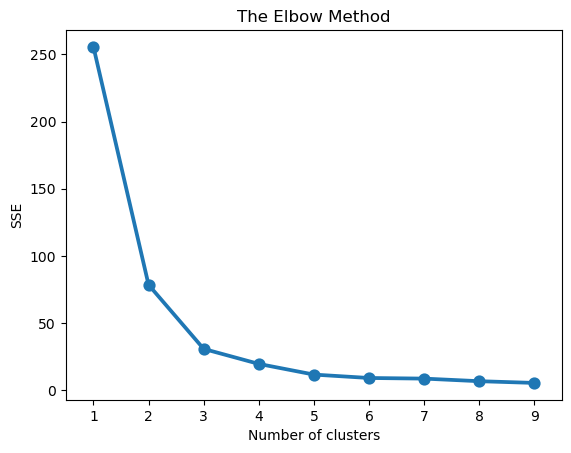

In [33]:
plt.figure()
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.title('The Elbow Method')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [34]:
kmeans = KMeans(n_clusters=2,init='k-means++',max_iter=1000) 
kmeans.fit(test_data)
#print("labels",kmeans.labels_)
cluster_ids=kmeans.predict(test_data)
cluster_ids
test_data["cluster"]=kmeans.fit_predict(test_data)



C:\Users\tilak\AppData\Local\Temp\ipykernel_26632\2343985475.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["cluster"]=kmeans.fit_predict(test_data)


### Validating the factors that good for model

In [35]:
x=PDU3[[  'contract_type_code', 'fuel_group_code','mine_id_pudl', 'mine_id_pudl_label', 'fuel_mmbtu_per_unit', 'sulfur_content_pct', 
       'mercury_content_ppm', 'moisture_content_pct','chlorine_content_ppm']]
y=PDU3['fuel_cost_per_mmbtu']
regr = linear_model.LinearRegression()
regr.fit(x,y)
mlr = sm.OLS(y,x).fit()
predictions = mlr.predict(x)
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     fuel_cost_per_mmbtu   R-squared (uncentered):                   0.978
Model:                             OLS   Adj. R-squared (uncentered):              0.978
Method:                  Least Squares   F-statistic:                          1.792e+04
Date:                 Tue, 04 Mar 2025   Prob (F-statistic):                        0.00
Time:                         20:21:00   Log-Likelihood:                          24017.
No. Observations:                 3254   AIC:                                 -4.802e+04
Df Residuals:                     3246   BIC:                                 -4.797e+04
Df Model:                            8                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
contract_type_code      -0.0960      0.006    -15.213      0.000      -0.108      -0.084
fuel_group_code          0.3474      0.105      3.311      0.001       0.142       0.553
mine_id_pudl          3.904e-06   8.83e-06      0.442      0.658   -1.34e-05    2.12e-05
mine_id_pudl_label    3.904e-06   8.83e-06      0.442      0.658   -1.34e-05    2.12e-05
fuel_mmbtu_per_unit      0.1200      0.006     19.236      0.000       0.108       0.132
sulfur_content_pct      -0.1850      0.020     -9.318      0.000      -0.224      -0.146
mercury_content_ppm      2.1112      0.205     10.284      0.000       1.709       2.514
moisture_content_pct    -0.0103      0.001    -19.386      0.000      -0.011      -0.009
chlorine_content_ppm     0.0001   9.63e-05      1.556      0.120   -3.89e-05       0.000
==============================================================================
Omnibus:                     2000.776   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11435585.946
Skew:                          -1.116   Prob(JB):                         0.00
Kurtosis:                     293.411   Cond. No.                     1.99e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 5.92e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### From this out put i observed that there is no change in  R square vaule and p values for factors that are good for prediction of the model